In [10]:
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import numba
from matplotlib.colors import LogNorm
import uproot_methods
import glob
from tqdm.auto import tqdm
import gzip
import pickle

In [11]:
dfc = pd.concat(map(pd.read_csv,tqdm(glob.glob("/home/users/namin/2019/scouting/repo/beamspot/outputs_full2018/*.csv"))))

In [27]:
dfc

,x,y,z,run,lumi
0,0.096837,-0.067508,-0.235287,316153,703
1,0.096833,-0.067510,-0.285604,316153,626
2,0.096860,-0.067532,-0.217627,316153,710
3,0.096855,-0.067539,-0.394764,316153,743
4,0.096829,-0.067498,-0.372810,316153,666
...,...,...,...,...,...
72,0.095450,-0.061728,-0.003077,325170,553
73,0.095538,-0.061831,0.399790,325170,1075
74,0.095488,-0.061689,0.183379,325170,308
75,0.095538,-0.061831,0.399790,325170,1078


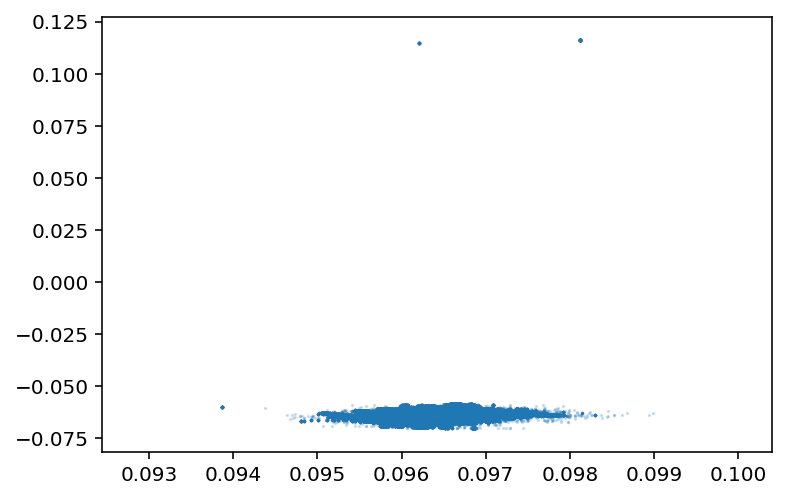

In [28]:
plt.scatter(dfc.x,dfc.y,alpha=0.2,s=0.5)

In [29]:
dfc[["x","y","z"]] = dfc[["x","y","z"]].astype("float32")
dfc[["run","lumi"]] = dfc[["run","lumi"]].astype("int32")

In [30]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258233 entries, 0 to 76
Data columns (total 5 columns):
x       258233 non-null float32
y       258233 non-null float32
z       258233 non-null float32
run     258233 non-null int32
lumi    258233 non-null int32
dtypes: float32(3), int32(2)
memory usage: 6.9 MB


In [31]:
dfc

,x,y,z,run,lumi
0,0.096837,-0.067508,-0.235287,316153,703
1,0.096833,-0.067510,-0.285604,316153,626
2,0.096860,-0.067532,-0.217627,316153,710
3,0.096855,-0.067539,-0.394764,316153,743
4,0.096829,-0.067498,-0.372810,316153,666
...,...,...,...,...,...
72,0.095450,-0.061728,-0.003077,325170,553
73,0.095538,-0.061831,0.399790,325170,1075
74,0.095488,-0.061689,0.183379,325170,308
75,0.095538,-0.061831,0.399790,325170,1078


In [62]:
df = dfc.sort_values(["run","lumi"])

In [65]:
d = []
for run,lumi,x,y,z in tqdm(df[["run","lumi","x","y","z"]].values):
    run = int(run)
    lumi = int(lumi)
    d.append([run,lumi,float(x),float(y),float(z)])
#     break
d.append([0,0] + df[["x","y","z"]].mean(axis=0).values.tolist())
# print(d)
with gzip.open("beamspots_2018.pkl.gz","wb") as fh:
    pickle.dump(d,fh,2)

In [23]:

# t = uproot.open("/hadoop/cms/store/user/namin/ProjectMetis/ScoutingCaloMuon_Run2018C-v1_RAW_v3/output_1.root")["Events"]
# t = uproot.open("/hadoop/cms/store/user/namin/ProjectMetis/ScoutingCaloMuon_Run2018C-v1_RAW_v3/output_2.root")["Events"]

In [17]:
# %%time
# run = t["run"].array()
# lumi = t["luminosityBlock"].array()

In [18]:
# %%time
# df = pd.DataFrame(dict(run=run,lumi=lumi))
# df

In [19]:
# df = df.merge(dfbs,how="left",on=["run","lumi"])

In [21]:
# dfbs["xyz"] = list(dfbs[["x","y","z"]].itertuples(index=False,name=None))
# bstable = dfbs.set_index(["run","lumi"])["xyz"].to_dict()
# bstable

In [22]:
# dfbs["xyz"] = list(dfbs[["x","y","z"]].itertuples(index=False,name=None))
# bstable = dfbs.set_index(["run","lumi"])["xyz"].to_dict()